In [91]:
import pandas as pd
import numpy as np


In [92]:
df = pd.read_csv("tweet_data.csv")

In [93]:
df.sample(10)

,textID,tweet_text,sentiment
13939,1751432438,@AnnCurry those photos are lovely! Who knew yo...,positive
4831,1962842897,@Cherryadestains It was blatently your fault f...,negative
15374,1752476575,@dredpiraterob poor thing. come watch tv at my...,negative
797,1957360852,@TerrenceJ106 I'm up wit cha!! Just got home f...,positive
3092,1961260346,Ohhhh man My mom got a bag of these caramel c...,positive
9988,1694165316,@souravghosh Dreams give rise to reality. When...,positive
1897,1960160894,wow.. tomorrow and then it's over. i'll never ...,negative
4691,1962731638,"this laptop is going to die, its not working!",negative
7508,1965019119,@CThun @regent_lord Can't we just all get along?,negative
903,1957420885,@BrandyWandLover Oh I see who u mean now-tht h...,negative


In [94]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [95]:
tweet_id = 4879
tweet = df.iloc[tweet_id]

In [96]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


* Visualization

In [97]:
import matplotlib.pyplot as plt

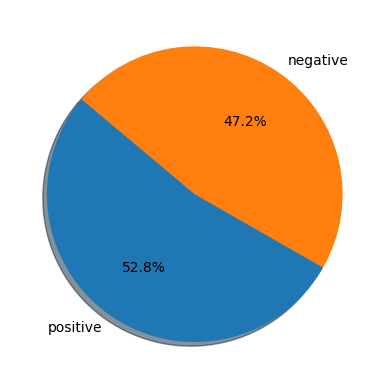

In [98]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [99]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


Learning Word cloud

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [100]:
from nltk.corpus import stopwords

from wordcloud import WordCloud

* What are the words most often present in positive tweets?

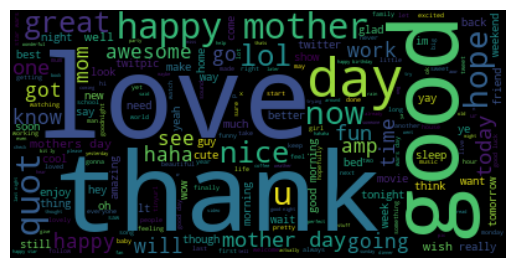

In [101]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* ... and in negative tweets?

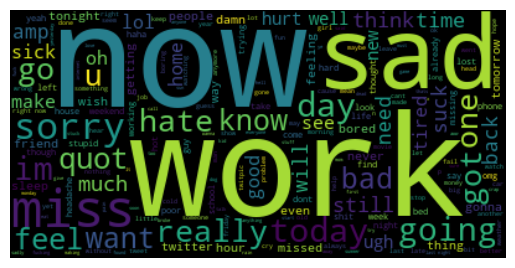

In [102]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text Normalization

In [103]:
import re

Random Tweet:

In [104]:
tweet =  "Lokesh RT @Ghost_dante hello I am amazing! check me out at  😉 https://lost_wizard.com #LOKESH#ghost"

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [105]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [106]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: Lokesh @Ghost_dante hello I am amazing! check me out at  😉 https://lost_wizard.com #LOKESH#ghost


#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [107]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [108]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: Lokesh RT twitteruser hello I am amazing! check me out at  😉 https://lost_wizard.com #LOKESH#ghost


Emojis

* Install the `emoji` package

In [109]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


In [110]:
import emoji

* Replace emojis with a meaningful text

In [111]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [112]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: Lokesh RT @Ghost_dante hello I am amazing! check me out at  :winking_face: https://lost_wizard.com #LOKESH#ghost


Hangling URL

In [113]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [114]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: Lokesh RT @Ghost_dante hello I am amazing! check me out at  😉  #LOKESH#ghost


Working with #TAGS

* Replace occurences of `#_something_` with a default value

In [115]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [116]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: Lokesh RT @Ghost_dante hello I am amazing! check me out at  😉 https://lost_wizard.com LOKESHghost


Words nomalization/cleaning 

In [117]:
tweet = "YOOOOOOOOO what's up? I love this Dron!!!!!!"

Working with capital LETTERS

* Lower case each letter in a specific tweet

In [118]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [119]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: yooooooooo what's up? i love this dron!!!!!!


Working with repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [120]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [121]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: YOO what's up? I love this Dron!!


When Punctuations are repeated.

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [122]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [123]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: YOOOOOOOOO what's up? I love this Dron!


Word contraction

In [124]:
pip install contractions

* Import the installed package

In [125]:
import contractions

* Use `contractions_dict` to list most common contractions

In [126]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [127]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [128]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: YOOOOOOOOO what is up? I love this Dron!!!!!!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [129]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [130]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: YOOOOOOOOO what is up? I love this Dron!!!!!!


Learning Tokenization

In [131]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [132]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lokes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple tweet to be tokenized

In [133]:
tweet = "Holy shit! I am so excited to be here. I love this place."

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [134]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [135]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))




<class 'list'>
Tweet tokens: ['Holy', 'shit', '!', 'I', 'am', 'so', 'excited', 'to', 'be', 'here', '.', 'I', 'love', 'this', 'place', '.']


Custom Tokenization

In [136]:
import string

In [137]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Create a set of english stopwords

In [138]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lokes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [139]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'until', 're', 'isn', 'myself', 'on', 'yourselves', 'the', 'from', 've', 'where', 'when', "it's", 'itself', 'these', 'after', 'o', "isn't", 'into', 'so', 'and', 'what', 'own', 'down', 'mustn', 'if', "didn't", 'then', 'your', 'being', 'him', 'each', 'while', 'hadn', 'didn', 'through', 'will', 'been', 'our', 'won', 'herself', 'weren', 'were', 'any', 'm', 'himself', "hadn't", "couldn't", "wasn't", 'my', 'had', 'll', 'me', 'all', 'such', 'nor', 'some', "shan't", 'am', 'them', 'ain', "that'll", 'aren', "shouldn't", "weren't", "mightn't", 'which', 'they', 'have', 'a', 'once', 'below', 'shouldn', 'was', "should've", "needn't", 'their', 'theirs', "you've", 'having', 'only', "won't", 'd', "haven't", 'has', 's', 'yours', 'ma', 'yourself', 'how', 'by', 'in', 'her', 'should', 'ourselves', 'can', 'very', 'who', 'at', 'off', 'that', 'does', 'against', 'i', 'more', 'couldn', 'mightn', 't', 'shan', 'here', 'you', 'out', 'is', "aren't", "wouldn't", 'hasn', 'because', 'wouldn', 'about', 'up', "you'd", 

* Remove some stopwords from the set

In [140]:
stop_words.discard('not')
print(stop_words)

{'until', 're', 'isn', 'myself', 'on', 'yourselves', 'the', 'from', 've', 'where', 'when', "it's", 'itself', 'these', 'after', 'o', "isn't", 'into', 'so', 'and', 'what', 'own', 'down', 'mustn', 'if', "didn't", 'then', 'your', 'being', 'him', 'each', 'while', 'hadn', 'didn', 'through', 'will', 'been', 'our', 'won', 'herself', 'weren', 'were', 'any', 'm', 'himself', "hadn't", "couldn't", "wasn't", 'my', 'had', 'll', 'me', 'all', 'such', 'nor', 'some', "shan't", 'am', 'them', 'ain', "that'll", 'aren', "shouldn't", "weren't", "mightn't", 'which', 'they', 'have', 'a', 'once', 'below', 'shouldn', 'was', "should've", "needn't", 'their', 'theirs', "you've", 'having', 'only', "won't", 'd', "haven't", 'has', 's', 'yours', 'ma', 'yourself', 'how', 'by', 'in', 'her', 'should', 'ourselves', 'can', 'very', 'who', 'at', 'off', 'that', 'does', 'against', 'i', 'more', 'couldn', 'mightn', 't', 'shan', 'here', 'you', 'out', 'is', "aren't", "wouldn't", 'hasn', 'because', 'wouldn', 'about', 'up', "you'd", 

* Create a `custom_tokenize` function

In [141]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular tweet

In [142]:
tweet = "Holy shit! what the hell are you doing here in america!"

In [143]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['Holy', 'shit', '!', 'what', 'the', 'hell', 'are', 'you', 'doing', 'here', 'in', 'america', '!']
Tweet tokens: ['Holy', 'shit', 'what', 'the', 'hell', 'are', 'you', 'doing', 'here', 'in', 'america']
Tweet tokens: ['Holy', 'shit', 'hell', 'america']


Learning Stemming 


In [144]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [145]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [146]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [147]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [148]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [149]:
tokens = ["international", "companies", "had", "interns"]

In [150]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


Learning Lemmatization

In [151]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lokes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [152]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [153]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [154]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [155]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [156]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


Arranging all together in one!

* Long and complex tweet to be processed

In [157]:
complex_tweet = r"""RT @dante_ghost : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://tdfdf.dane and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [158]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

* Test your `process_tweet` function!

In [159]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [160]:
import random

In [161]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: My jeans that were once two inches too long are now about five inches too long. Holy cow, am I getting shorter?!?
Post Twitter processing tweet: My jeans that were once two inches too long are now about five inches too long. Holy cow, am I getting shorter?!?
Post Word processing tweet: my jeans that were once two inches too long are now about five inches too long. holy cow, am i getting shorter?
['jean', 'two', 'inch', 'long', 'five', 'inch', 'long', 'holi', 'cow', 'get', 'shorter']


Initial tweet: Oh... I miss the Piano.
Post Twitter processing tweet: Oh... I miss the Piano.
Post Word processing tweet: oh. i miss the piano.
['oh', 'miss', 'piano']


Initial tweet: A shower feels so refreshing after a long day at the fair
Post Twitter processing tweet: A shower feels so refreshing after a long day at the fair
Post Word processing tweet: a shower feels so refreshing after a long day at the fair
['shower', 'feel', 'refresh', 'long', 'day', 'fair']


Initial tweet: So cold

Processing Data

In [162]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


* Apply `process_tweet` function created above 2 to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [163]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


* Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)







In [164]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [165]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

Calculating by postive and negative frequency

* Corpus of tweet tokens used for the first method

In [166]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


</table>


In [167]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

* Build the frequency dictionnary on the corpus by using the function

In [168]:
freqs = build_freqs(corpus, sentiment)

In [169]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Build the frequency dictionnary on the entire dataset by using the function

In [170]:
freqs_all = build_freqs(X, y)

In [171]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1358
Frequency of word 'love' in - tweets: 67


* Create a `tweet_to_freqs` function used to convert tweets to a 2-d array by using the frequency dictionnary

In [172]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

* Print the 2-d vector by using the `tweet_to_freqs` function and the *corpus* dictionnary

In [173]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


* Print the 2-d vector by using the `tweet_to_freqs` function and the *dataset* dictionnary

In [174]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[1358.   67.]


* Plot word vectors in a chart and see where they locate

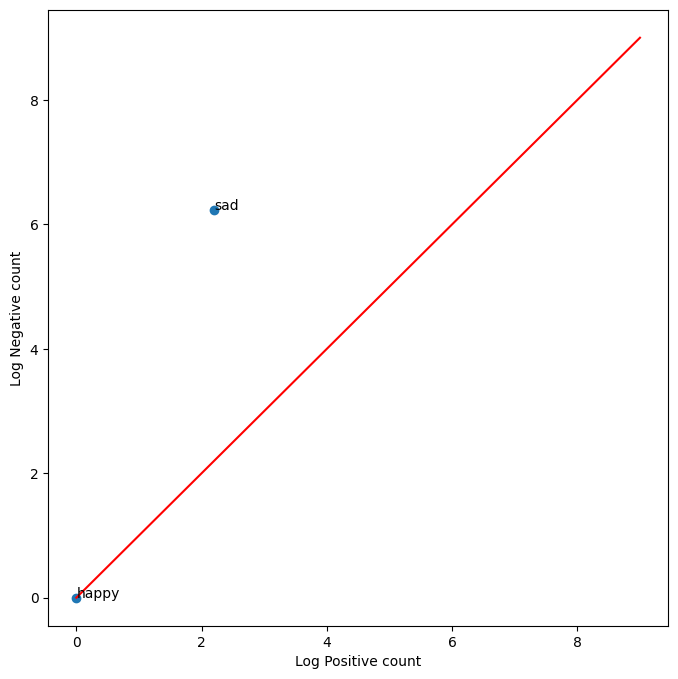

In [175]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happy"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

Bag of Words

* Corpus of tweet tokens used for the second method

In [176]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from the Scikit-learn Library

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [178]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus

In [179]:
cv_vect = fit_cv(corpus)

c:\Users\lokes\anaconda3\envs\SentimentEnv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Get the vectorizer features (matrix columns)

In [180]:
ft = cv_vect.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

* Convert the corpus to a matrix by using the vectorize

In [ ]:
cv_mtx = cv_vect.transform(corpus)

* Print the matrix shape

In [ ]:
print("Matrix shape is: {}".format(cv_mtx.shape))

* Convert the matrix to an array

In [ ]:
cv_mtx.toarray()

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

In [ ]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

Term Frequency-Inverse Document frequency --- Third method

* Corpus of tweet tokens used for the third method

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `TfidfVectorizer` from the Scikit-learn Library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_tfidf` function used to build the TF-IDF vectorizer with the corpus

In [ ]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus

In [ ]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

* Get the vectorizer features (matrix columns)

In [ ]:
ft = tf_vect.get_feature_names()

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

* Print the matrix shape

In [ ]:
print(tf_mtx.shape)

* Convert the matrix to an array

In [ ]:
tf_mtx.toarray()

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

Creating the model 

* Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

MOdelling
* Test/train data split

* Check what X and y looks like

In [ ]:
print(X)
print(y)

* Import the `train_test_split` function from the Scikit-Learn package

In [ ]:
from sklearn.model_selection import train_test_split

* Use the `train_test_split` function to split arrays of X and y into training and testing variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

* Print the size of these news variables

In [ ]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

* Print random tweets, just to verify everything goes as expected

In [ ]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Logistic Regression

MOdelling

* Import the `LogisticRegression` model from Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

* Create a `fit_lr` function used to fit a Logistic Regression model on X and y *training* data

In [ ]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

Positive - Negative Frequency

* Use the `build_freqs` function on training data to create a frequency dictionnary
* Use the frequency dictionnary together with the `tweet_to_freq` function to convert X_train and X_test data to 2-d vectors

In [ ]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

* Fit the Logistic Regression model on training data by using the `fit_lr` function
* Print the model coefficients (betas and intercept)

In [ ]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

** Count Vector

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [ ]:
model_lr_cv = fit_lr(X_train_cv, y_train)

** TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [ ]:
model_lr_tf = fit_lr(X_train_tf, y_train)

* Performance Metrics

* Import the `accuracy score` and `confusion matrix` from Scikit-Learn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

* Positive/Negative Frequencies

* Use the fitted `model_lr_pn` (positive/negative frequencies) to predict X_test



In [ ]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

* Print the model accuracy by comparing predictions and real sentiments

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

* Count Vector

* Use the fitted `model_lr_cv` (Bag-of-words) to predict X_test



In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

* Print the model accuracy by comparing predictions and real sentiments

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

* TF-IDF

* Use the fitted `model_lr_tf` (TF-IDF) to predict X_test



In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Print the model accuracy by comparing predictions and real sentiments

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

* Mini-Pipeline


* Final tweet used to check if the model works as well as expected


In [ ]:
your_tweet = """Naruto is the best TV show but its very long so you cannot  watch it all, which is sad"""

* Create a `predict_tweet` function used to pre-process, transform and predict tweet sentiment

In [ ]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

* ... Predict your tweet sentiment by using the `predict_tweet` function!

In [ ]:
predict_tweet(your_tweet)